In [ ]:
import os
from pathlib import Path
import importlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal


%matplotlib widget
sns.set_context('talk')

%tb
from eidynamics import utils, data_quality_checks, ephys_classes
import analysis
import all_cells


Make a table of all experiments on all cells

In [ ]:
all_cell_data = []
sweeps = []

cell_set = all_cells.all_cells

project_path_root = Path( r"\\storage.ncbs.res.in\adityaa\\" )

for cell in cell_set:
    cellpath = project_path_root / cell
    # cellpath = cell
    cellID = cellpath.stem
    cellpickle = cellpath / (str(cellID) + ".pkl")
    print(cellpickle)

    neuron = ephys_classes.Neuron.loadCell(cellpickle)
    neuron_data = neuron.data

    all_cell_data.append(neuron_data)
    sweeps.append(neuron_data.shape[0])


all_expt = pd.concat(all_cell_data, ignore_index=True, axis=0) 
# del cell_set, cellID, cellpath, cellpickle, neuron_data, _ss, all_cell_data, sweeps, neuron, led, peak_props, first_pulse_start, res_traces, expt_ids, expt_idxs, i, j,    
# # all_expt.to_hdf('all_expt_data.h5', format='fixed', key='data', mode='w')

In [ ]:
df3 = all_expt.iloc[:,:29]

# CC Cells

### Fig 1: CC | [expt_seq vs first-pulse-response] X cell_ID
Does the first pulse response decrease during an experiment session on a cell?

An experiment session consists of an array of experiments done on the cell with every experiment corresponding to one protocol (one stim frequency)

Observation: Across all the patterns, as the session progresses, the EPSP response of the cell to the optical stimulation decreases.

In [ ]:
plt.close('all')
# plt.figure()
df_subset = df3.loc[ (df3["Clamp"]== 0.0)  & (df3["intensity"]== 100.0) & (df3["pulseWidth"]== 2.0) & (df3["AP"]== 0.0) & (df3["patternID"] < 56) & (df3["GABAzineFlag"]== 0.0) & (df3["numSq"]>= 1.0)].copy() 
cat = sns.catplot(data=df_subset, y='firstpeakres', x='expt_seq', hue='numSq', col='cellID', col_wrap=5, palette='viridis', kind='point', markers=["^", "o", "s"] ) #  
cat.fig.suptitle('CC | [expt_seq vs first-pulse-response] X cell_ID | Control, Intensity=100%, Pulse Width = 2ms')
cat.fig.subplots_adjust(top=.9)
plt.show()

### Fig 2: CC | [Expt sequence vs IR ] x Cell_ID
Does the input resistance of the cell change during an experiment session on a cell?

An experiment session consists of an array of experiments done on the cell with every experiment corresponding to one protocol (one stim frequency)


In [ ]:
plt.close('all')
plt.figure()
df_subset = df3.loc[ (df3["Clamp"]== 0.0) & (df3["GABAzineFlag"]== 0.0) & (df3["intensity"]== 100.0) & (df3["pulseWidth"]== 2.0)   & (df3["patternID"] < 56) ].copy()
cat = sns.catplot(data=df_subset, y='InputRes', x='expt_seq', hue='numSq', col='cellID', palette='viridis', col_wrap=5, kind='point', markers=["^", "o", "s"] )
cat.fig.suptitle('CC | [expt_seq vs Input Resistance (MOhm)] X cell_ID | Control, Intensity=100%, Pulse Width = 2ms')
cat.fig.subplots_adjust(top=.9)
plt.show()

### Fig 3: CC | [Expt sequence vs Tau ] x Cell_ID
Does the Tau of the cell change during an experiment session on a cell?

An experiment session consists of an array of experiments done on the cell with every experiment corresponding to one protocol (one stim frequency)


In [ ]:
plt.close('all')
plt.figure()
df_subset = df3.loc[ (df3["Clamp"]== 0.0) & (df3["GABAzineFlag"]== 0.0) & (df3["intensity"]== 100.0) & (df3["pulseWidth"]== 2.0)   & (df3["patternID"] < 56) ].copy() 
df_subset.loc[:,"Tau"] *= 1000
cat = sns.catplot(data=df_subset, y='Tau', x='expt_seq', hue='numSq', col='cellID', palette='viridis', col_wrap=5, kind='point', markers=["^", "o", "s"] )
cat.fig.suptitle('CC | [expt_seq vs Tau (ms)] X cell_ID | Control, Intensity=100%, Pulse Width = 2ms')
cat.fig.subplots_adjust(top=.9)
plt.show()

### Fig 4: CC | [Expt sequence vs Baseline (mV) ] x Cell_ID
Does the Vm of the cell change during an experiment session on a cell?

An experiment session consists of an array of experiments done on the cell with every experiment corresponding to one protocol (one stim frequency)


In [ ]:
plt.close('all')
plt.figure()
df_subset = df3.loc[ (df3["Clamp"]== 0.0) & (df3["GABAzineFlag"]== 0.0) & (df3["intensity"]== 100.0) & (df3["pulseWidth"]== 2.0)   & (df3["patternID"] < 56) ].copy() 
df_subset.loc[:,"Tau"] *= 1000
cat = sns.catplot(data=df_subset, y='MeanBaseline', x='expt_seq', hue='numSq', col='cellID', palette='viridis', col_wrap=5, kind='point', markers=["^", "o", "s"] )
cat.fig.suptitle('CC | [expt_seq vs Baseline (mV)] X cell_ID | Control, Intensity=100%, Pulse Width = 2ms')
cat.fig.subplots_adjust(top=.9)
plt.show()

# VC Cells

### Fig 5: VC | [Expt sequence vs first-pulse-response x EI ] x numSq x_cellID
Does the first pulse response decrease during an experiment session on a cell?

An experiment session consists of an array of experiments done on the cell with every experiment corresponding to one protocol (one stim frequency)

Observation: Across all the patterns, as the session progresses, the EPSP response of the cell to the optical stimulation decreases.

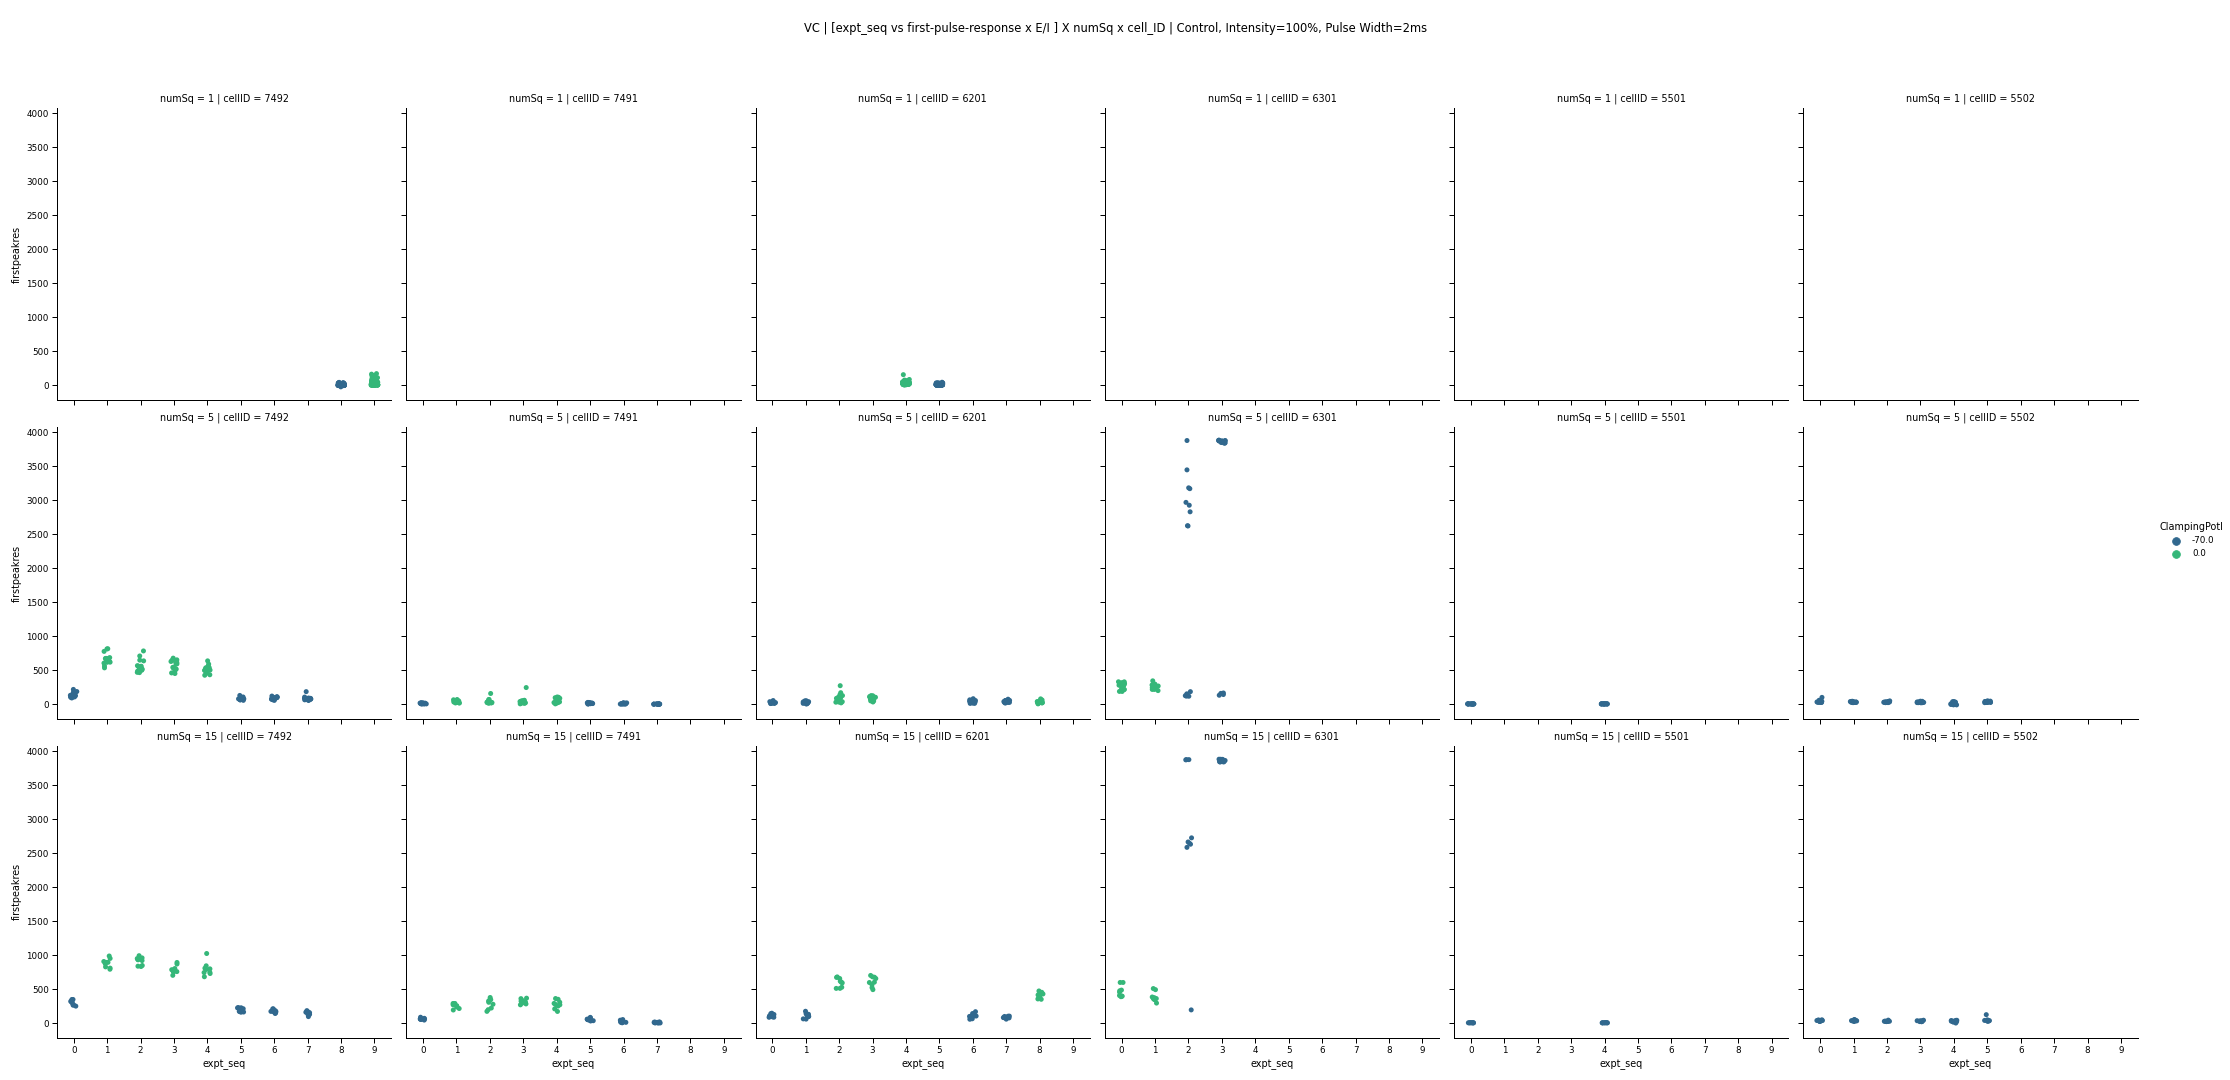

In [54]:
plt.close('all')
# plt.figure()
df_subset = df3.loc[ (df3["Clamp"]== 1.0)  & (df3["intensity"]== 100.0) & (df3["pulseWidth"]== 2.0) & (df3["AP"]== 0.0) & (df3["patternID"] < 56) & (df3["GABAzineFlag"]== 0.0) & (df3["numSq"]>= 1.0)].copy() 
cat = sns.catplot(data=df_subset, y='firstpeakres', x='expt_seq', hue='ClampingPotl', col='cellID', row='numSq', palette='viridis', kind='strip')#, markers=["^", "o", "s"] ) #  
cat.fig.suptitle('VC | [expt_seq vs first-pulse-response x E/I ] X numSq x cell_ID | Control, Intensity=100%, Pulse Width=2ms')
cat.fig.subplots_adjust(top=.9)
plt.show()

### Fig 2: VC | [Expt sequence vs series resistance x EI ] x numSq x_cellID
Does the input resistance of the cell change during an experiment session on a cell?

An experiment session consists of an array of experiments done on the cell with every experiment corresponding to one protocol (one stim frequency)


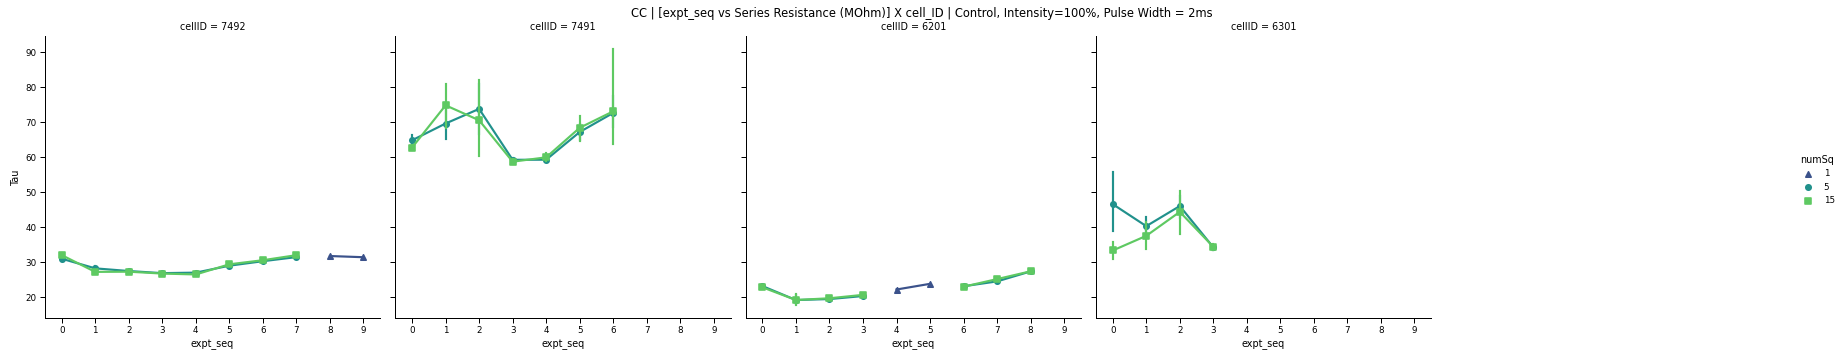

In [88]:
plt.close('all')
# plt.figure()
df_subset = df3.loc[ (df3["Clamp"]== 1.0) & (df3["GABAzineFlag"]== 0.0) & (df3["intensity"]== 100.0) & (df3["pulseWidth"]== 2.0)   & (df3["patternID"] < 56) & (df3["Tau"] < 100) & (df3["Tau"] > 0.0)].copy()
cat = sns.catplot(data=df_subset, y='Tau', x='expt_seq', hue='numSq', col='cellID', palette='viridis', col_wrap=5, kind='point', markers=["^", "o", "s"])
cat.fig.suptitle('VC | [expt_seq vs Series Resistance (MOhm)] X cell_ID | Control, Intensity=100%, Pulse Width = 2ms')
cat.fig.subplots_adjust(top=.9)
plt.show()

### Fig 3: CC | [Expt sequence vs Tau ] x Cell_ID
Does the Tau of the cell change during an experiment session on a cell?

An experiment session consists of an array of experiments done on the cell with every experiment corresponding to one protocol (one stim frequency)


In [ ]:
plt.close('all')
plt.figure()
df_subset = df3.loc[ (df3["Clamp"]== 1.0) & (df3["GABAzineFlag"]== 0.0) & (df3["intensity"]== 100.0) & (df3["pulseWidth"]== 2.0)   & (df3["patternID"] < 56) ].copy() 
df_subset.loc[:,"Tau"] *= 1000
cat = sns.catplot(data=df_subset, y='Tau', x='expt_seq', hue='numSq', col='cellID', palette='viridis', col_wrap=5, kind='point', markers=["^", "o", "s"] )
cat.fig.suptitle('CC | [expt_seq vs Tau (ms)] X cell_ID | Control, Intensity=100%, Pulse Width = 2ms')
cat.fig.subplots_adjust(top=.9)
plt.show()

### Fig 4: CC | [Expt sequence vs Baseline (mV) ] x Cell_ID
Does the Vm of the cell change during an experiment session on a cell?

An experiment session consists of an array of experiments done on the cell with every experiment corresponding to one protocol (one stim frequency)


In [ ]:
plt.close('all')
plt.figure()
df_subset = df3.loc[ (df3["Clamp"]== 1.0) & (df3["GABAzineFlag"]== 0.0) & (df3["intensity"]== 100.0) & (df3["pulseWidth"]== 2.0)   & (df3["patternID"] < 56) ].copy() 
df_subset.loc[:,"Tau"] *= 1000
cat = sns.catplot(data=df_subset, y='MeanBaseline', x='expt_seq', hue='numSq', col='cellID', palette='viridis', col_wrap=5, kind='point', markers=["^", "o", "s"] )
cat.fig.suptitle('CC | [expt_seq vs Baseline (mV)] X cell_ID | Control, Intensity=100%, Pulse Width = 2ms')
cat.fig.subplots_adjust(top=.9)
plt.show()

In [ ]:
def plot_cell_prop(df3, cellid, prop):
    plt.close('all')

    df_test = df3.loc[(df3["cellID"] == cellid)]
    sns.catplot(data=df_test, x='expt_seq', y=prop, hue='numSq', col='exptID', col_wrap=5, kind='point' )
    figpath = Path(r"\\storage.ncbs.res.in\adityaa\Lab\Projects\EI_Dynamics\AnalysisFiles\all_cells_tau_19May22\\")
    plt.savefig(figpath / ('cc_' + str(cellid) + '_' + prop + '.png'))

In [ ]:
df_CC = df3.loc[(df3["Clamp"]== 0.0)]
cc_cells =  list(pd.unique(df_CC["cellID"]))
for ccell in cc_cells:
    for p in ['firstpeakres']:
        print(ccell, p)
        plot_cell_prop(df3, ccell, p)
plt.close('all')

In [ ]:
plt.close('all')
df_cc = df3.loc[(df3["Clamp"]== 0.0)]

sns.catplot(data=df_cc, x='sweep', y=prop, hue=, col='expt_seq', col_wrap=5, kind='point' )
figpath = Path(r"\\storage.ncbs.res.in\adityaa\Lab\Projects\EI_Dynamics\AnalysisFiles\all_cells_tau_19May22\\")
plt.savefig(figpath / ('cc_' + str(cellid) + '_' + prop + '.png'))

### Fig. 2: CC Within-experiment Sweep vs Peak Response of first pulse

Observation: Within a single experiment, across all cells, and across all experiments, first pulse response does not differ significantly for 3 repeats


In [ ]:
plt.close('all')
# plt.figure()
df_subset = df3.loc[ (df3["Clamp"]== 0.0) & (df3["ClampingPotl"]== -70.0) & (df3["AP"]== 0.0) & (df3["GABAzineFlag"]== 0.0) & (df3["intensity"]== 100.0) & (df3["pulseWidth"]== 2.0) & (df3["numSq"]> 2.0) & (df3["patternID"] < 56) ]
cat = sns.catplot(data=df_subset, y='firstpeakres', x='sweep', hue='numSq', col='patternID', palette='viridis', col_wrap=4, kind='point', )#join=True)#, markers=["^", "o"], linestyles=['-','--'])
cat.fig.suptitle('Response to first pulse (mV) progression with sweeps across patterns in CC recordings')
cat.fig.subplots_adjust(top=.9)
# plt.show()

### Fig. 3: Input resistance across experiment session

Observation: Continuous decline in IR

In [ ]:
plt.close('all')
# plt.figure()
df_subset = df3.loc[ (df3["Clamp"]== 0.0) & (df3["ClampingPotl"]== -70.0) & (df3["AP"]== 0.0) & (df3["intensity"]== 100.0) & (df3["pulseWidth"]== 2.0) & (df3["numSq"]> 2.0) & (df3["patternID"] < 56) ]
cat = sns.catplot(data=df_subset, y='InputRes', x='expt_seq', palette='viridis', kind='point', )#join=True)#, markers=["^", "o"], linestyles=['-','--'])
cat.fig.suptitle('CC: Input resistance of the Cell (MOhm) in the experiment session')
cat.fig.subplots_adjust(top=.9)


### Fig 4: CC Input Resistance progression long the experiment session

Observation: IR decreases consistently as the session porgresses

In [ ]:
plt.close('all')
# plt.figure()
df_subset = df3.loc[ (df3["Clamp"]== 0.0) & (df3["ClampingPotl"]== -70.0) & (df3["AP"]== 0.0) & (df3["intensity"]== 100.0) & (df3["pulseWidth"]== 2.0) & (df3["numSq"]> 2.0) & (df3["patternID"] < 56) ]
cat = sns.catplot(data=df_subset, y='InputRes', x='sweep', palette='viridis', hue='expt_seq', kind='point', col='expt_seq', col_wrap=4 )#join=True)#, markers=["^", "o"], linestyles=['-','--'])
cat.fig.suptitle('CC: Input resistance of the Cell (MOhm) vs Sweeps')
cat.fig.subplots_adjust(top=.9)